In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import optical_cond
import my_my_maxent as maxent
import sys

# sys.path.append('/oak/stanford/orgs/simes/rebjin/dqmc-dev/util')
sys.path.append('/Users/rebekahjin/Documents/Devereaux Group/dqmc-dev/util')
import util

import importlib
import os
import pandas as pd

import scienceplots
plt.style.use(['science','no-latex'])
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg") 

default_figsize = plt.rcParams['figure.figsize']
print("Default figsize:", default_figsize)
plt.rcParams['lines.markersize'] = 1
plt.rcParams['lines.linewidth'] = 1

Default figsize: [3.5, 2.625]


/var/folders/9h/hnm6v9vj2s7c2q01hnv03k1m0000gn/T/ipykernel_43537/3791880314.py:19: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("svg")


In [14]:
### Standardize filepaths for U
U = 6
# parent_dir = '/oak/stanford/orgs/simes/rebjin/nflux1_n0.9/'
parent_dir = '/Users/rebekahjin/Documents/Devereaux Group/nflux1_n0.9'

row_list = []
for subdir, dirs, files in os.walk(parent_dir):
    if f'U{U}' in subdir and '/.ipynb_checkpoints' not in subdir:
        # Get path
        path = subdir+'/'
        
        # Get params
        Ny, Nx, beta, L, tp = util.load_firstfile(
            path, "metadata/Nx", "metadata/Ny", "metadata/beta", "params/L", "metadata/t'"
        )

        # Add to dict for df
        dict = {
            'path': path,
            'U': U,
            'beta': np.round(beta, 6), 
            'Ny': Ny,
            'Nx': Nx,
            'L': L,
            'tp': tp
        }
        row_list.append(dict)
        
params_df = pd.DataFrame(row_list)
params_df = params_df.sort_values(by=['beta'], ascending = False)
params_df = params_df.reset_index(drop=True)
pd.set_option('display.width', 2000)
print(params_df)

                                                path  U   beta Ny Nx   L tp
0  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  3.000  8  8  30  0
1  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  2.000  8  8  20  0
2  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  1.500  8  8  15  0
3  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  1.250  8  8  20  0
4  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  1.000  8  8  10  0
5  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  0.700  8  8  10  0
6  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  0.500  8  8  10  0
7  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  0.250  8  8  10  0
8  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  0.125  8  8  10  0


In [15]:
### Example using restructured code
importlib.reload(maxent)
importlib.reload(optical_cond)

# Get path (from cleaned up params_df)
beta = 3
path = params_df[params_df['beta']== beta]['path'].item()
print(path)

### Define ws
num_w = 300
ws, dws = maxent.gen_grid(num_w, -2.1, 2.1, lambda x: 0.4 * np.sinh(2.5 * x))
w_lim = np.max(ws)

## Compare spectra from diff. alpha (in-depth)
# First let's compare alpha variations from bootstraps for both
bs = 0
# sig1 = optical_cond.sigma(path, 'xy', ws, dws, settings_xx={'krnl': 'symm'}, settings_xy = {'opt_method': 'Bryan', 'smooth_al': False}, bs=bs)
sig2 = optical_cond.sigma(path, 'xy', ws, dws, settings_xx={'krnl': 'symm'}, settings_xy = {'opt_method': 'cvxpy', 'smooth_al': True}, bs=bs)

/Users/rebekahjin/Documents/Devereaux Group/nflux1_n0.9/beta3_U6_mu-1.275/


/Users/rebekahjin/Library/Python/3.9/lib/python/site-packages/cvxpy/problems/problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [ ]:
c = None
if np.any(c):
    print('a')


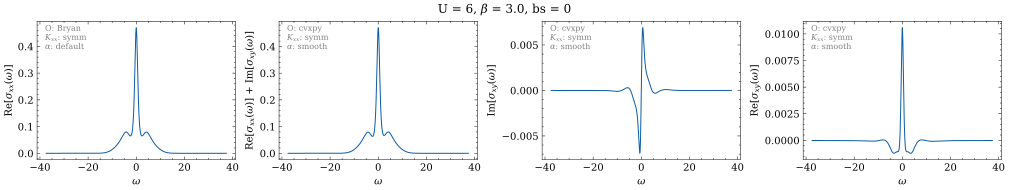

<Figure size 350x262.5 with 0 Axes>

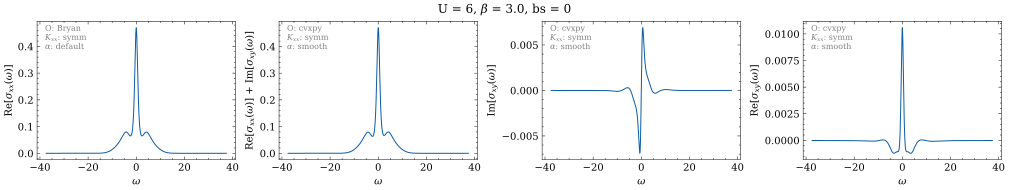

In [16]:
# optical_cond.plot_results(sig1, bs_mode='all')
optical_cond.plot_results(sig2, bs_mode='all')
plt.savefig('output.png', dpi=300)
# optical_cond.plot_results(sig1, bs_mode='errorbar')
optical_cond.plot_results(sig2, bs_mode='errorbar')

0.0025611298729053995


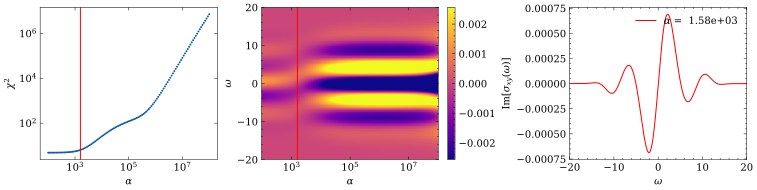

0.00035356134951136653


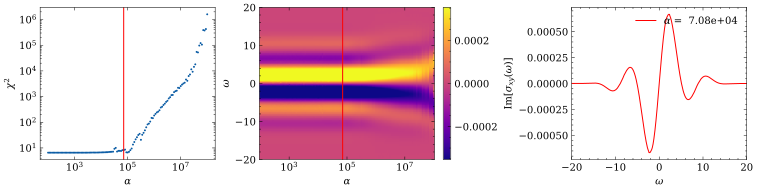

In [ ]:
importlib.reload(maxent)
importlib.reload(optical_cond)
bs = 0
# optical_cond.inspect_al(sig1, 'xy', bs, als_plot=[10**3.1, 10**3.7])
optical_cond.inspect_al(sig1, 'xy', bs, als_plot=[], redo_select_al=False)
# optical_cond.inspect_al(sig2, 'xx', bs, als_plot=[10**3])
optical_cond.inspect_al(sig2, 'xy', bs, als_plot=[], redo_select_al=False)

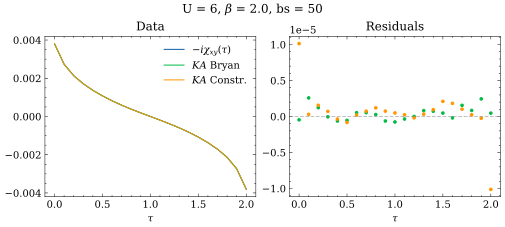

In [ ]:
optical_cond.compare_chi_tau([sig1, sig2], mode='xy')

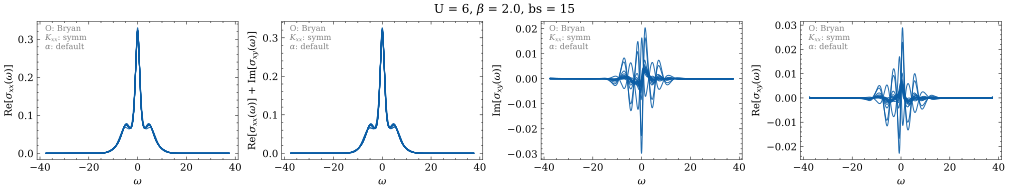

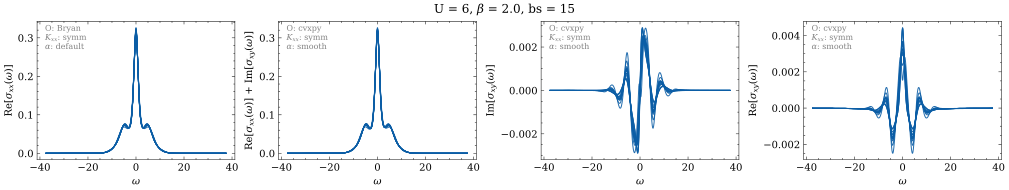

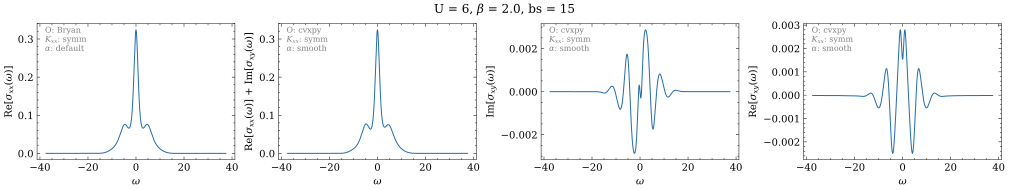

In [180]:
importlib.reload(maxent)
importlib.reload(optical_cond)

optical_cond.plot_results(sig1, bs_mode='all')
optical_cond.plot_results(sig2, bs_mode='all')

# optical_cond.plot_results(sig1, bs_mode='errorbar')
# optical_cond.plot_results(sig2, bs_mode='errorbar')
optical_cond.plot_results(sig2, bs_mode='all', bs_idx=[9])

/Users/rebekahjin/Library/Python/3.9/lib/python/site-packages/cvxpy/problems/problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


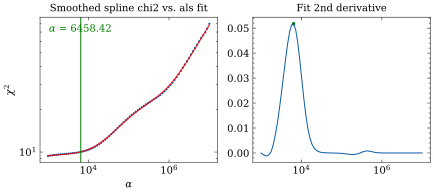

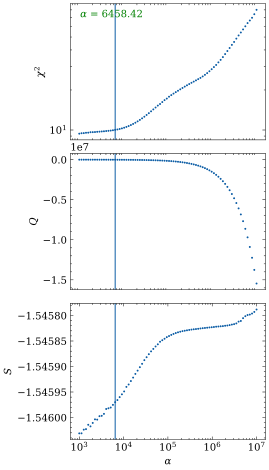

In [181]:
importlib.reload(maxent)
importlib.reload(optical_cond)
# optical_cond.show_al_selection(sig1, 'xy', 0)
optical_cond.show_al_selection(sig2, 'xy', 9)

In [183]:
# Check alphas
print(sig1.results['al_sum'].apply(lambda x: f"{x:.2e}").to_numpy())
print(sig2.results['al_sum'].apply(lambda x: f"{x:.2e}").to_numpy())

['6.31e+02' '2.00e+03' '2.51e+03' '2.51e+03' '2.82e+03' '1.41e+03'
 '3.16e+03' '2.51e+03' '6.31e+02' '2.24e+03' '2.82e+03' '3.16e+03'
 '1.58e+03' '2.24e+03' '2.82e+03' '2.82e+03' '1.58e+03' '2.82e+03'
 '3.16e+03' '1.00e+03' '2.00e+03' '1.58e+03' '1.26e+03' '2.82e+03'
 '2.00e+03' '2.51e+03' '2.82e+03' '2.82e+03' '3.16e+03' '3.16e+03'
 '2.24e+03' '7.08e+04' '2.00e+03' '1.78e+03' '2.51e+03' '2.24e+03'
 '1.00e+03' '3.98e+03' '2.82e+03' '1.78e+03' '2.51e+03' '3.16e+03'
 '2.00e+03' '2.00e+03' '3.16e+03' '3.55e+03' '1.78e+03' '1.78e+03'
 '2.24e+03' '2.24e+03']
['2.82e+06' '2.51e+06' '3.55e+07' '1.12e+06' '8.91e+05' '2.24e+06'
 '2.82e+07' '2.00e+07' '2.00e+06' '3.98e+07' '3.55e+07' '1.78e+06'
 '2.00e+06' '3.55e+07' '3.16e+07' '3.16e+07' '7.94e+05' '4.47e+07'
 '3.55e+07' '2.00e+06' '3.55e+07' '3.16e+07' '3.16e+07' '1.58e+06'
 '1.26e+06' '3.16e+07' '2.00e+06' '2.82e+07' '2.82e+06' '1.41e+06'
 '3.98e+07' '3.16e+07' '7.08e+06' '1.00e+06' '8.91e+05' '1.26e+06'
 '8.91e+05' '1.12e+06' '1.00e+06' '2.0

In [144]:
# Look at results
print(sig1.results)
print(sig2.results)

                                            re_sig_xx                                          im_sig_xy                                            sig_sum                                          re_sig_xy                                           resample            norm_sum                                              A_sum                                               A_xy       al_sum                                             As_sum                                               A_xx             norm_xx        al_xx                                              As_xx
0   [4.576554542935734e-16, 2.199327680425879e-15,...  [4.432302748081842e-05, 2.8592768149917277e-05...  [4.432302748127607e-05, 2.8592768152116605e-05...  [5.342125625210644e-05, 2.4077176770275504e-05...  [70, 73, 14, 45, 60, 59, 39, 71, 31, 90, 2, 63...  0.5234288419997618  [3.514117119152125e-05, 2.1889891469153817e-05...  [3.5141171191158405e-05, 2.1889891467470057e-0...  3162.277660  [[0.002487704106373435, 0.0

In [9]:
### Example using restructured code
importlib.reload(maxent)
importlib.reload(optical_cond)

# Get path (from cleaned up params_df)
beta = 3
path = params_df[params_df['beta']== beta]['path'].item()
print(path)

### Define ws
num_w = 300
ws, dws = maxent.gen_grid(num_w, -2.1, 2.1, lambda x: 0.4 * np.sinh(2.5 * x))
w_lim = np.max(ws)

### Compare sig_xx
bs = 20
sig_xx_symm = optical_cond.sigma(path, 'xx', ws, dws, settings_xx={'krnl': 'symm', 'inspect_al': False}, bs=bs)
sig_xx_full = optical_cond.sigma(path, 'xx', ws, dws, settings_xx={'krnl': 'full', 'opt_method': 'Bryan','inspect_al': False}, bs=bs)
sig_xx_constr = optical_cond.sigma(path, 'xx', ws, dws, settings_xx={'krnl': 'full', 'opt_method': 'cvxpy','inspect_al': False}, bs=bs)
sig_xx_symm.plot_results(bs_mode='all')
sig_xx_full.plot_results(bs_mode='all')
sig_xx_constr.plot_results(bs_mode='all')

/Users/rebekahjin/Documents/Devereaux Group/nflux1_n0.9/beta3_U6_mu-1.275/


Sigma_xx bootstraps:   0%|          | 0/20 [00:00<?, ?it/s]/Users/rebekahjin/Library/Python/3.9/lib/python/site-packages/cvxpy/problems/problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Sigma_xx bootstraps:  15%|█▌        | 3/20 [00:13<01:17,  4.58s/it]


KeyboardInterrupt: 

In [18]:
print(sig1.results['al_sum'].apply(lambda x: f"{x:.2e}"))
print(sig2.results['al_sum'].apply(lambda x: f"{x:.2e}"))


0     7.08e+02
1     6.31e+02
2     7.08e+02
3     3.16e+02
4     1.78e+04
5     8.91e+02
6     2.00e+04
7     4.47e+02
8     4.47e+02
9     1.58e+04
10    5.62e+02
11    1.12e+03
12    2.24e+04
13    7.08e+02
14    7.08e+02
15    3.55e+02
16    3.98e+02
17    1.00e+04
18    3.16e+02
19    2.00e+04
20    6.31e+02
21    1.58e+04
22    2.82e+04
23    1.26e+04
24    1.78e+04
25    4.47e+02
26    5.62e+02
27    4.47e+02
28    1.78e+04
29    1.12e+04
30    7.08e+02
31    1.26e+04
32    2.00e+04
33    2.00e+04
34    2.00e+04
35    4.47e+02
36    7.08e+02
37    7.94e+02
38    7.08e+02
39    3.55e+02
40    3.98e+02
41    1.58e+04
42    1.41e+04
43    7.08e+02
44    7.08e+02
45    5.01e+02
46    7.94e+02
47    7.94e+02
48    5.62e+02
49    8.91e+02
Name: al_sum, dtype: object
0     3.55e+02
1     1.00e+04
2     5.01e+02
3     6.31e+02
4     2.82e+02
5     1.58e+04
6     5.62e+02
7     3.55e+02
8     2.82e+02
9     3.98e+02
10    5.62e+02
11    6.31e+02
12    2.00e+02
13    7.08e+02
14    6.31e+

In [5]:
importlib.reload(maxent)
importlib.reload(optical_cond)
print(sig_xx_symm.results['al_xx'].apply(lambda x: f"{x:.2e}"))
print(sig_xx_full.results['al_xx'].apply(lambda x: f"{x:.2e}"))
print(sig_xx_constr.results['al_xx'].apply(lambda x: f"{x:.2e}"))


0     7.94e+03
1     8.91e+03
2     1.58e+04
3     5.62e+03
4     8.91e+03
5     5.62e+03
6     1.26e+04
7     7.94e+03
8     7.94e+02
9     5.62e+03
10    6.31e+03
11    1.00e+04
12    8.91e+03
13    5.62e+03
14    7.94e+03
15    4.47e+03
16    4.47e+03
17    5.62e+03
18    5.62e+03
19    8.91e+03
Name: al_xx, dtype: object
0     5.01e+03
1     5.01e+03
2     3.55e+03
3     5.62e+03
4     4.47e+03
5     5.01e+03
6     3.55e+03
7     4.47e+03
8     5.62e+03
9     3.98e+03
10    4.47e+03
11    2.24e+03
12    5.62e+03
13    2.00e+03
14    3.55e+03
15    4.47e+03
16    2.51e+03
17    3.98e+03
18    2.51e+03
19    4.47e+03
Name: al_xx, dtype: object
0     4.47e+03
1     2.82e+03
2     3.55e+03
3     3.16e+03
4     5.01e+03
5     3.16e+03
6     3.98e+03
7     3.55e+03
8     7.94e+03
9     2.51e+03
10    2.82e+03
11    2.82e+03
12    2.00e+03
13    3.16e+03
14    3.55e+03
15    2.82e+03
16    3.98e+03
17    4.47e+03
18    2.82e+02
19    4.47e+03
Name: al_xx, dtype: object


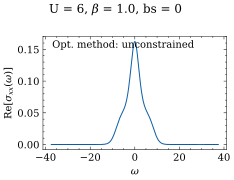

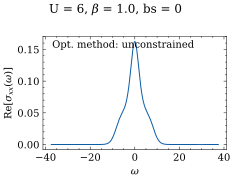

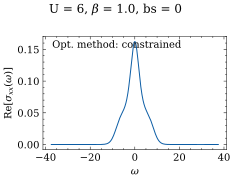

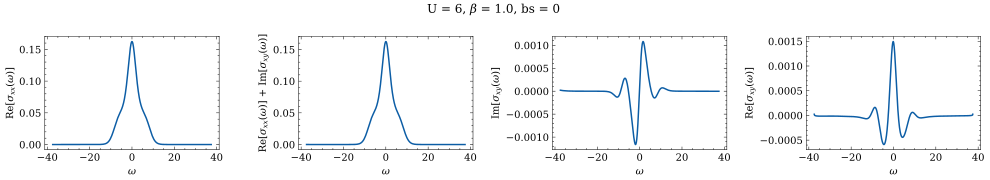

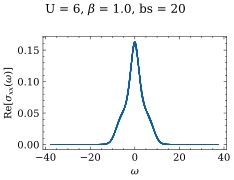

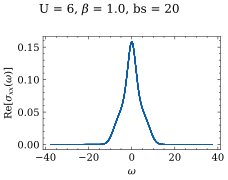

/Users/rebekahjin/Library/Python/3.9/lib/python/site-packages/cvxpy/problems/problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


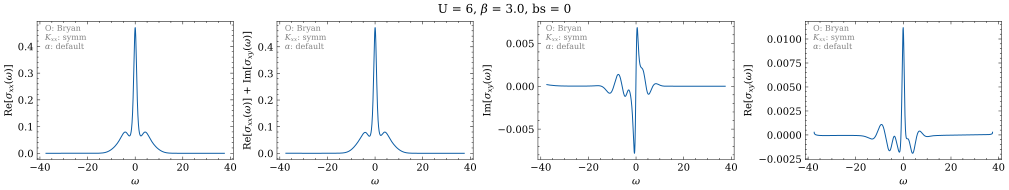

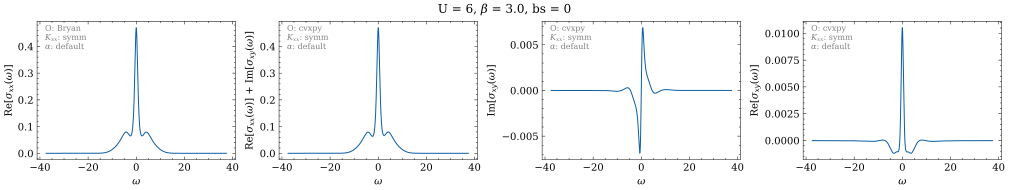

In [88]:
# Check current correlator residuals, I suppose for a variety of betas
importlib.reload(maxent)
importlib.reload(optical_cond)

beta = 3
path = params_df[params_df['beta']== beta]['path'].item()
ws, dws = maxent.gen_grid(num_w, -2.1, 2.1, lambda x: 0.4 * np.sinh(2.5 * x))
bs=0
sig1 = optical_cond.sigma(path, 'xy', ws, dws, settings_xx={'krnl': 'symm'}, settings_xy={'opt_method': 'Bryan'}, bs=bs)
sig2 = optical_cond.sigma(path, 'xy', ws, dws, settings_xx={'krnl': 'symm'}, settings_xy={'opt_method': 'cvxpy'}, bs=bs)

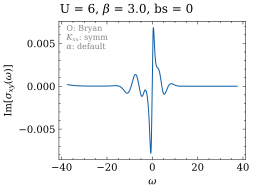

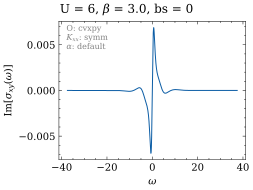

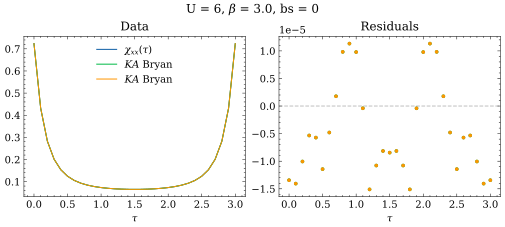

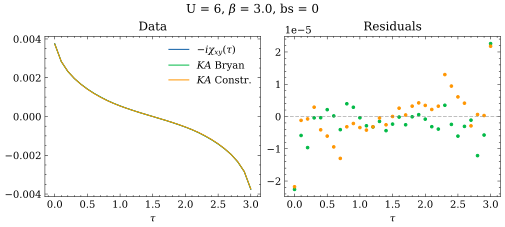

In [89]:
importlib.reload(maxent)
importlib.reload(optical_cond)
sig1.plot_results(['im_sig_xy'])
sig2.plot_results(['im_sig_xy'])
optical_cond.compare_chi_tau([sig1, sig2], mode='xx')
optical_cond.compare_chi_tau([sig1, sig2], mode='xy')